In [1]:
import pandas as pd

In [2]:
data = pd.read_pickle('/Users/rishavghosh/Downloads/merged_training.pkl')

In [3]:
data

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
...,...,...
566,that was what i felt when i was finally accept...,joy
36236,i take every day as it comes i m just focussin...,fear
76229,i just suddenly feel that everything was fake,sadness
131640,im feeling more eager than ever to claw back w...,joy


In [4]:
data['emotions'].unique()

array(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
      dtype=object)

In [5]:
data.shape

(416809, 2)

In [6]:
data.dropna()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
...,...,...
566,that was what i felt when i was finally accept...,joy
36236,i take every day as it comes i m just focussin...,fear
76229,i just suddenly feel that everything was fake,sadness
131640,im feeling more eager than ever to claw back w...,joy


In [7]:
data.shape

(416809, 2)

<Axes: xlabel='emotions', ylabel='count'>

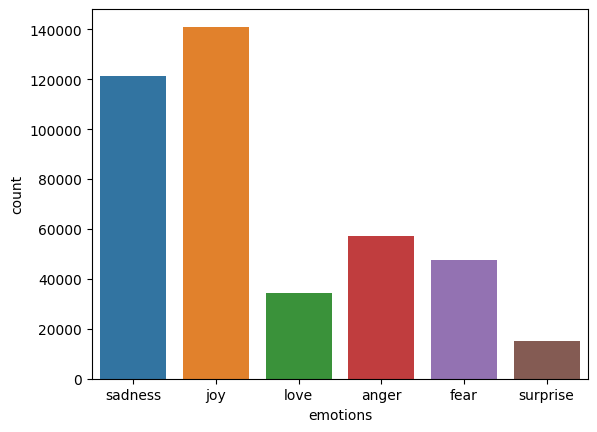

In [8]:
import seaborn as sns
sns.countplot(data = data, x = 'emotions')

In [9]:
len(data['text'][5])

6

In [10]:
import re
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        text = ' '.join(text.split())
        return text
    else:
        return ''

In [11]:
data['text'] = data['text'].apply(lambda x: clean_text(x))

In [12]:
data['text']

27383     i feel awful about it too because it s my job ...
110083                                im alone i feel awful
140764    ive probably mentioned this before but i reall...
100071             i was feeling a little low few days back
2837      i beleive that i am much more sensitive to oth...
                                ...                        
566       that was what i felt when i was finally accept...
36236     i take every day as it comes i m just focussin...
76229         i just suddenly feel that everything was fake
131640    im feeling more eager than ever to claw back w...
64703     i give you plenty of attention even when i fee...
Name: text, Length: 416809, dtype: object

In [13]:
x = data['text']
y = data['emotions']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [17]:
len(x_train[0])

5

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_x_train = cv.fit_transform(x_train)
cv_x_test = cv.transform(x_test)

In [19]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [20]:
mnb.fit(cv_x_train, y_train)

MultinomialNB()

In [21]:
y_pred_nb = mnb.predict(cv_x_test)

In [22]:
y_pred_nb

array(['sadness', 'sadness', 'fear', ..., 'joy', 'fear', 'fear'],
      dtype='<U8')

In [23]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [24]:
accuracy_nb

0.8594003662740017

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_pred and y_true are your predicted and true labels, respectively
# y_pred = mnb.predict(X_test)

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.859411508409725
Recall: 0.8594003662740017
F1 Score: 0.8524604496189014


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


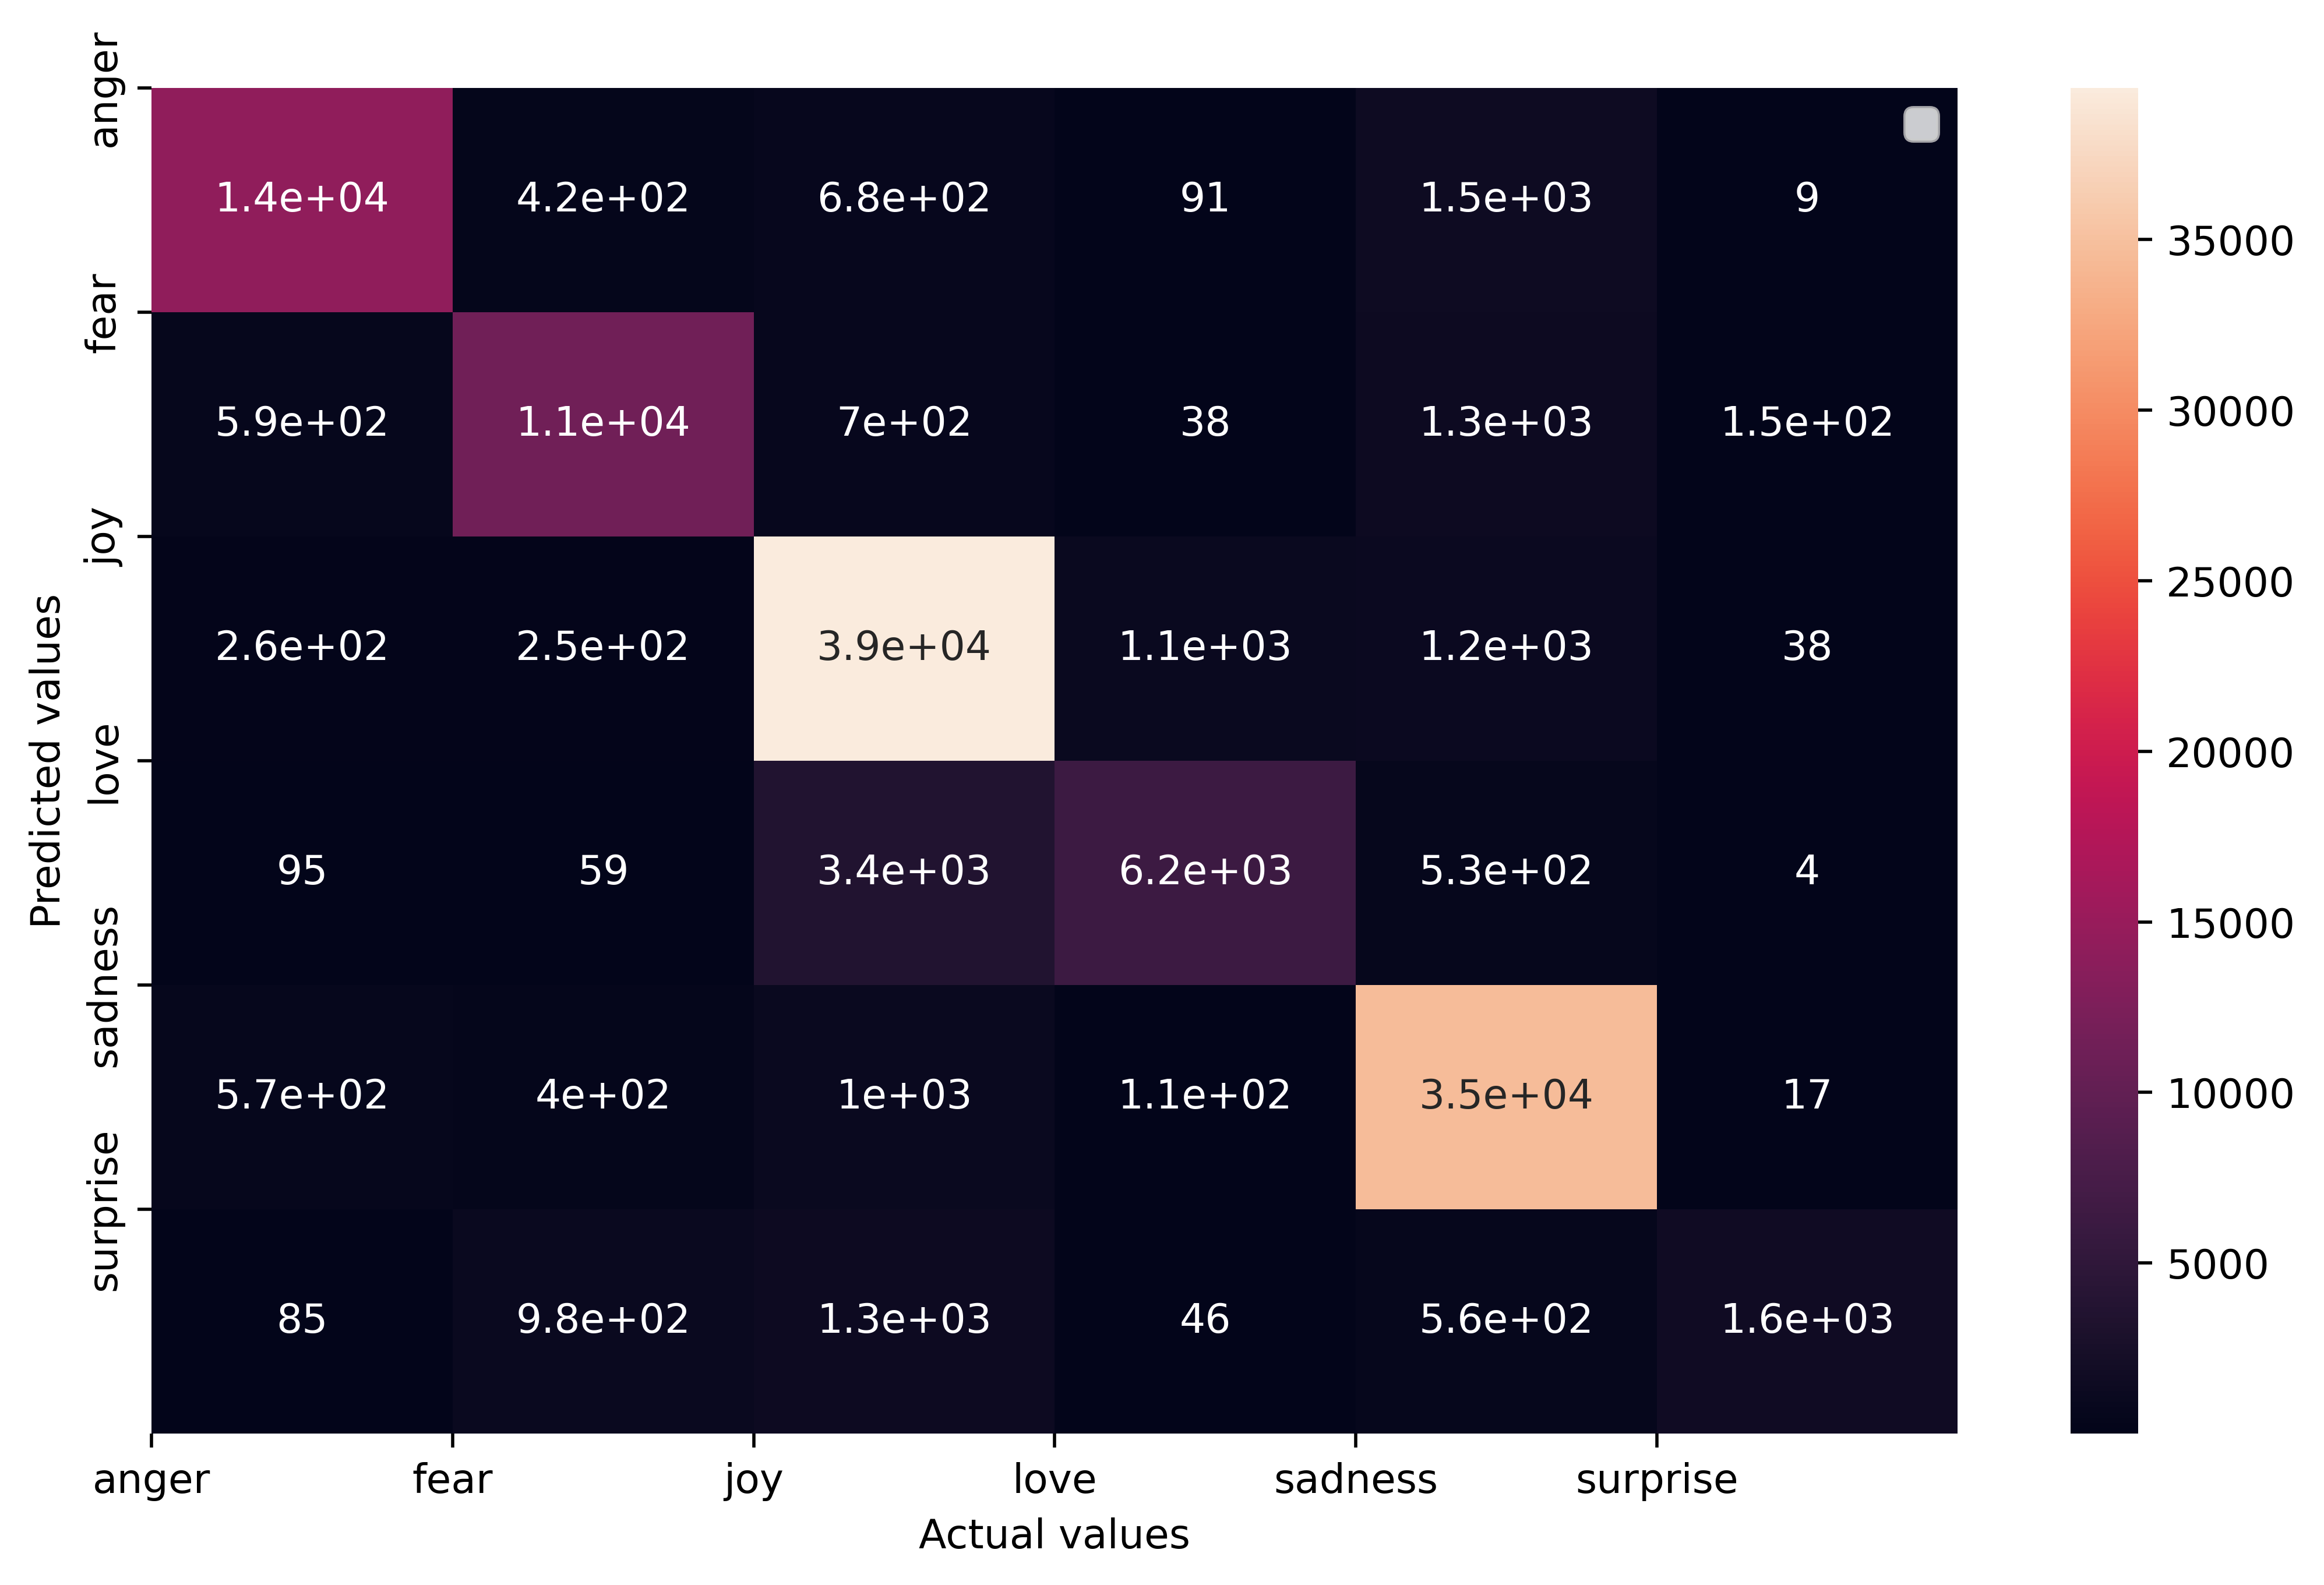

In [34]:
import matplotlib.pyplot as plt
class_names = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm, annot = True)
plt.xticks([0, 1, 2, 3, 4, 5], class_names)
plt.yticks([0, 1, 2, 3, 4, 5], class_names)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

In [26]:
text = ["I can't believe you did that again! It makes me so angry every time"]

In [27]:
text = cv.transform(text)

In [29]:
pred = mnb.predict(text)
pred

array(['sadness'], dtype='<U8')

In [21]:
import numpy as np
alpha_values = np.linspace(0.1, 2.0, 20)

In [22]:
accuracy_values = []

for alpha in alpha_values:
    clf = MultinomialNB(alpha=alpha)
    clf.fit(cv_x_train, y_train)
    y_pred = clf.predict(cv_x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

In [23]:
accuracy_values

[0.8511152163655702,
 0.8586886111177755,
 0.861743560215286,
 0.8637428724518765,
 0.8640467679118383,
 0.8640387706628919,
 0.863398990747183,
 0.8626632438441176,
 0.8611197747974697,
 0.8594003662740017,
 0.8577929192357829,
 0.8564653759106867,
 0.854418080180418,
 0.8523947761969882,
 0.8499796070151868,
 0.8479083195380789,
 0.8453332053773502,
 0.843253920651296,
 0.8407267899842454,
 0.838247642810873]

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(cv_x_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
rf_pred = classifier.predict(cv_x_test)
accuaracy_rf = accuracy_score(y_test, rf_pred)
accuaracy_rf

0.8589605175819518

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


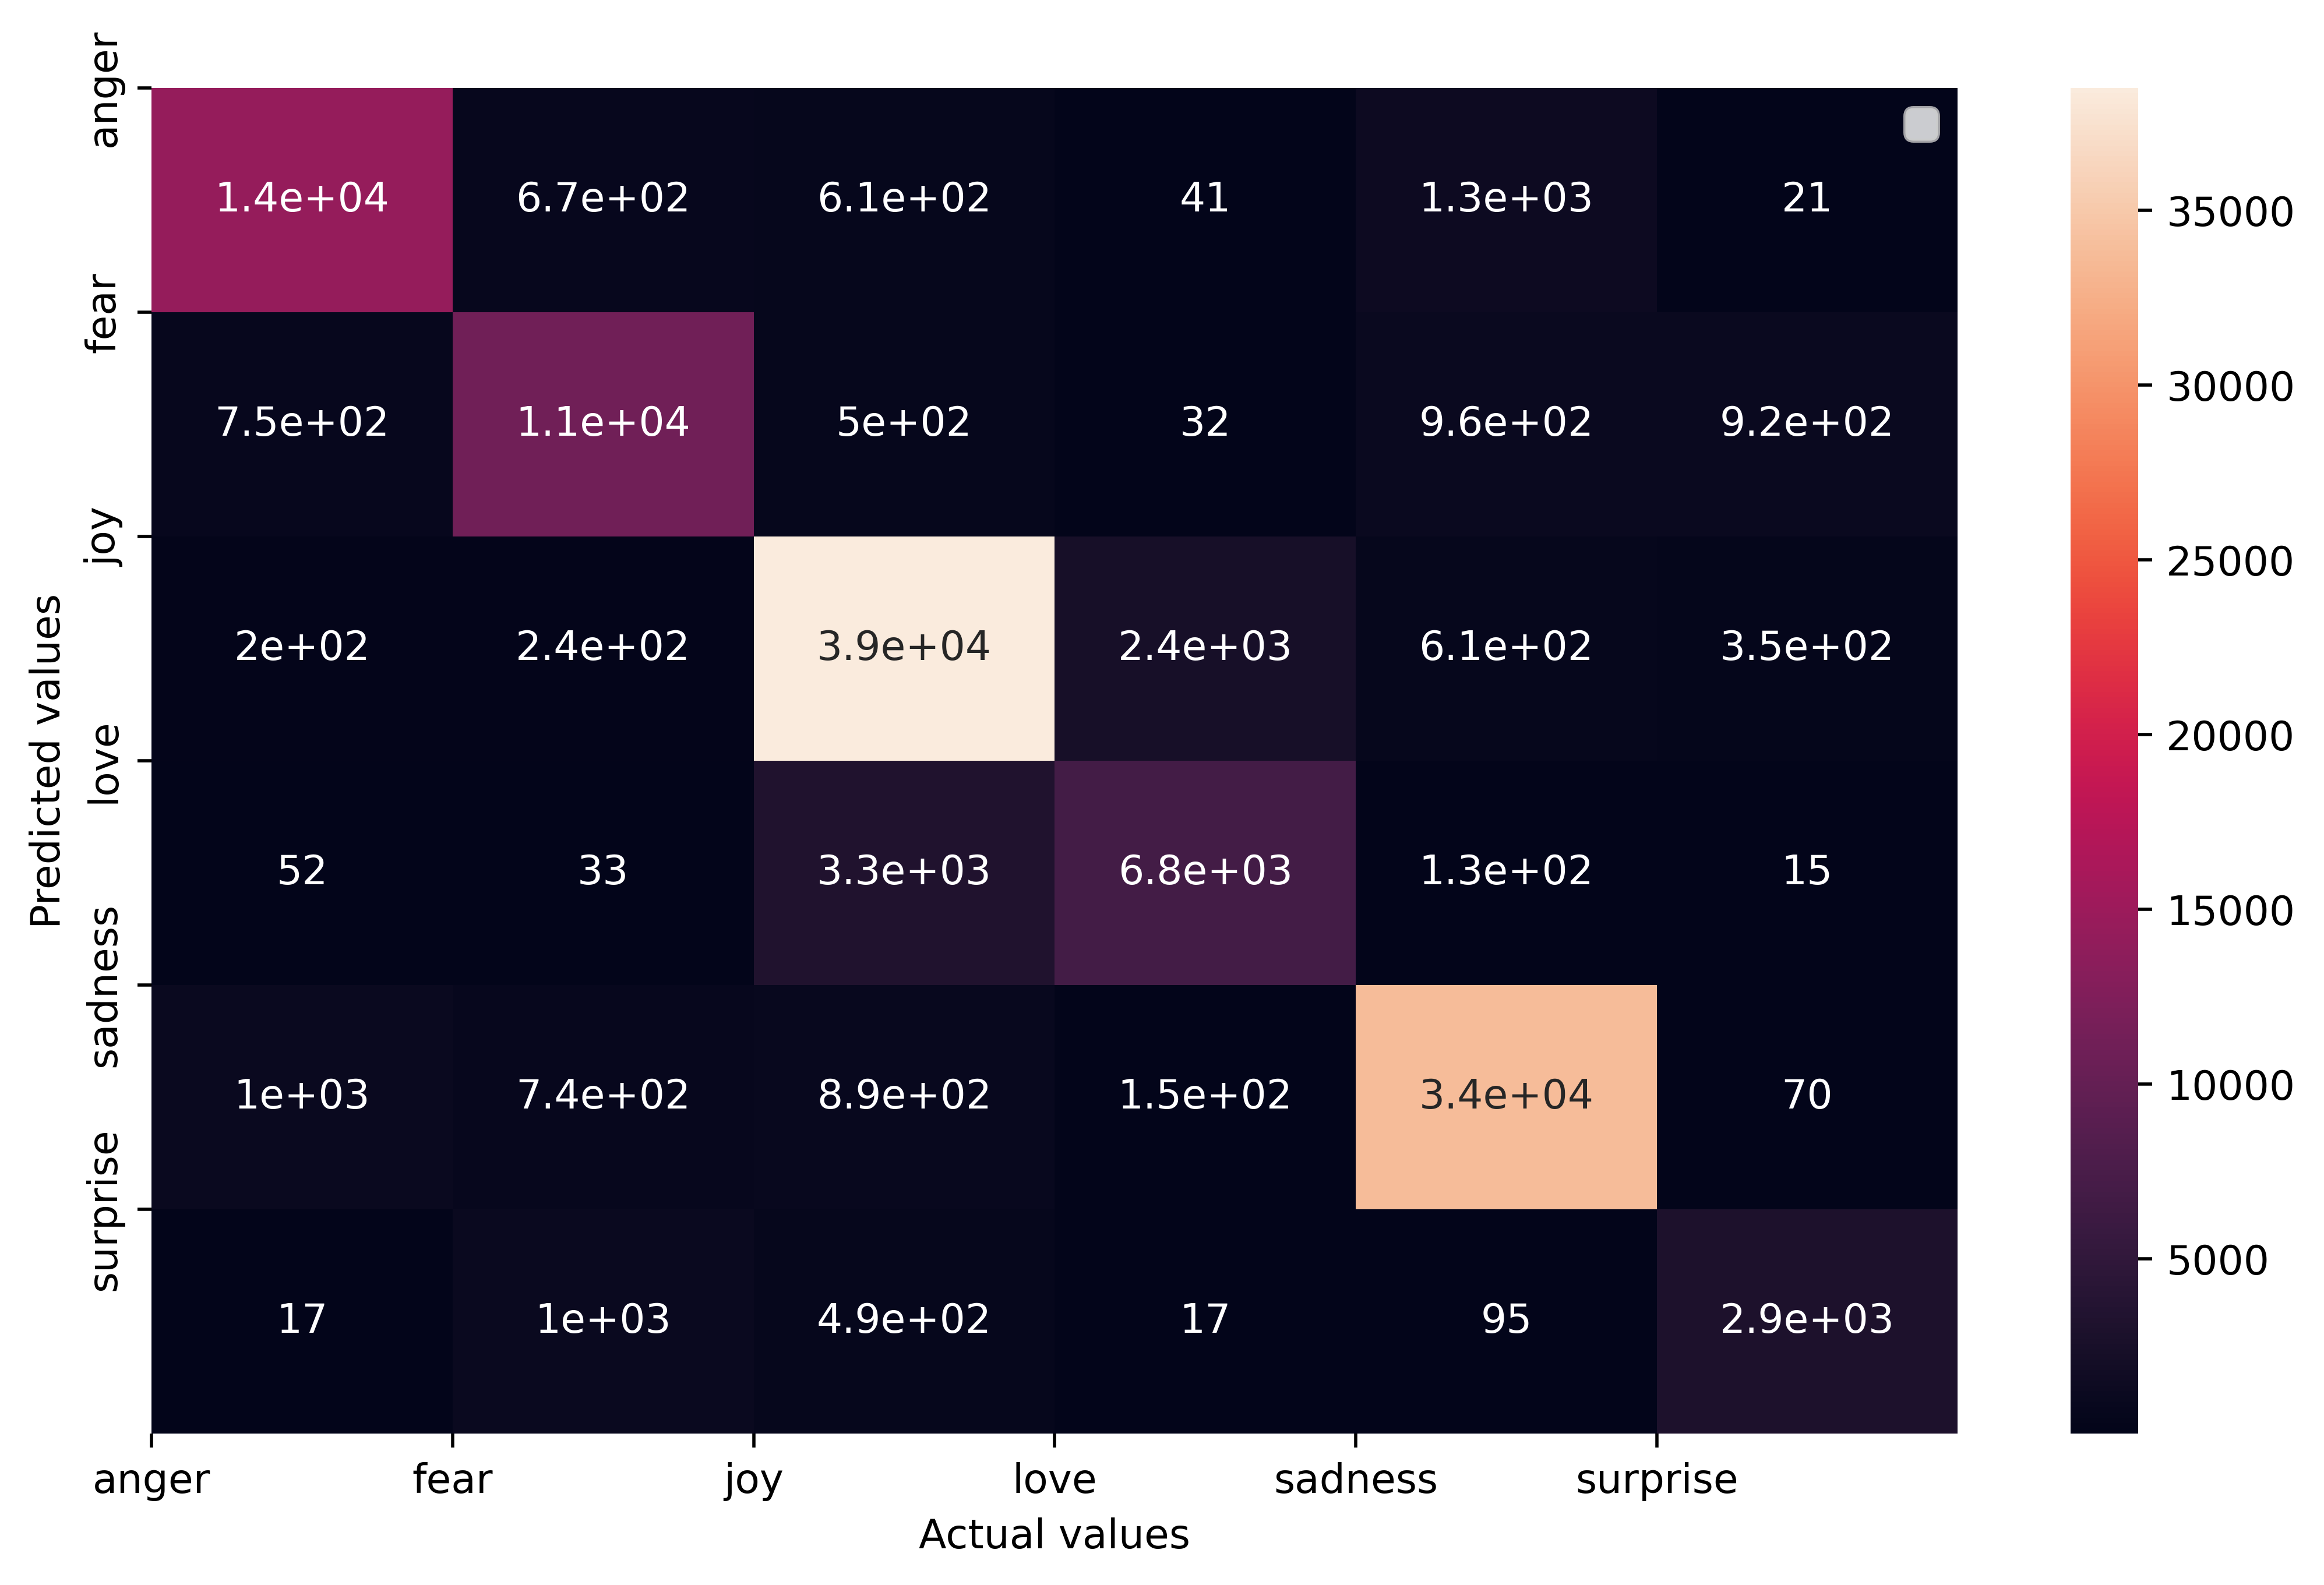

In [41]:
import matplotlib.pyplot as plt
class_names = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm, annot = True)
plt.xticks([0, 1, 2, 3, 4, 5], class_names)
plt.yticks([0, 1, 2, 3, 4, 5], class_names)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_pred and y_true are your predicted and true labels, respectively
# y_pred = mnb.predict(X_test)

# Compute precision, recall, and F1 score
precision = precision_score(y_test, rf_pred, average='weighted')
recall = recall_score(y_test, rf_pred, average='weighted')
f1 = f1_score(y_test, rf_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8571624181274896
Recall: 0.8589605175819518
F1 Score: 0.8576866935796293
